#  **Kaggle Image Classification Contest**
  Data Loader and Augmenter 

  Machine learning for Remote Sensing 2 - GNR638<br>
  Author: P Balasubramanian<br>
  Rollno: 200050103

In [1]:
import numpy as np
from numpy import asarray
from numpy import save

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
import random

In [2]:
classes = ["basketball_court","bridge","crosswalk","golf_course","oil_well","overpass","railway","runway","swimming_pool","tennis_court"]
no_classes = len(classes)

In [3]:
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/data/train/basketball_court/*.jpg")]

In [4]:
print("Shape of images: ",images[0].shape)
print("Number of images in class: ",len(images))
images = np.array(images)
print(images.shape)

Shape of images:  (256, 256, 3)
Number of images in class:  50
(50, 256, 256, 3)


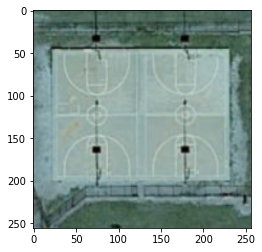

In [5]:
plt.imshow(images[0])

In [6]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.1,
        height_shift_range=0.1,
    shear_range=0.1,
    zoom_range= 0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode = "reflect")

for class_number,image_class in enumerate(classes):
  ran_imgs = random.sample(range(10, 49), 30)
  for i in range(len(ran_imgs)):
    ran_img = "0"+str(ran_imgs[i])
    path = "/content/drive/MyDrive/data/train/"+image_class+"/"+ran_img+".jpg"
    path2 = "/content/drive/MyDrive/data/train/"+image_class
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    j = 1
    for batch in datagen.flow(x, batch_size=1,save_to_dir= path2, save_prefix='aug_'+image_class+"_", save_format='jpg'):
      j += 1
      if j > 10:
        break 

In [7]:
# Creating np dataset
X_train = {}
Y_train = {}
for class_number,image_class in enumerate(classes):
  path = "/content/drive/MyDrive/data/train/"+image_class+"/*.jpg"
  images = [cv2.imread(file) for file in glob.glob(path)]
  X_train[image_class]=np.array(images)
  Y_train[image_class]=np.zeros(((X_train[image_class].shape[0]),no_classes))
  Y_train[image_class][:,class_number]=1

x_train = np.array(X_train["basketball_court"])
y_train = np.array(Y_train["basketball_court"])

class2 = classes
class2.remove("basketball_court")
for image_class in class2:
  x_train=np.concatenate((x_train,X_train[image_class]),axis=0)
  y_train=np.concatenate((y_train,Y_train[image_class]),axis=0)

print(x_train.shape, y_train.shape)


(3451, 256, 256, 3) (3451, 10)


In [8]:
# Saving dataset as npy files
save('/content/drive/MyDrive/data/X_train_augmented2.npy', x_train)
save('/content/drive/MyDrive/data/Y_train_augmented2.npy', y_train)

In [ ]:
# Creating np test dataset
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/data/gnr_test/*.jpg")]
print("Shape of images: ",images[0].shape)
print("Number of images in class: ",len(images))
no_images = len(images)
images = np.array(images)
print(images.shape)
save('/content/drive/MyDrive/data/X_test.npy', images)

Shape of images:  (256, 256, 3)
Number of images in class:  100
(100, 256, 256, 3)
